# Figure 2

Load librairies

In [16]:
import numpy as np                  # Data    
import pandas as pd                 # Data
import matplotlib.pyplot as plt     # Plot

Load librairies

In [17]:
plt.rcParams.update({"text.usetex": True,
                     "font.family": "serif",
                     "font.serif": ["Computer Modern"],
                     "font.size": 11,
                     "axes.labelsize": 11,
                     "legend.fontsize": 11,
                     "xtick.labelsize": 9,
                     "ytick.labelsize": 9})  

## Data & Methods

Read CF data

In [18]:
cf_solar = pd.read_csv('../Data/cf_solar_2018-2023.csv',
                         index_col = 0,
                         parse_dates = True).dropna()
cf_wind = pd.read_csv('../Data/cf_wind_2014-2023.csv',
                         index_col = 0,
                         parse_dates = True).dropna()

Select only 2023 data for solar PV

In [19]:
cf_solar = cf_solar.loc['2023']

Compute Median, Q1 and Q3

In [20]:
onw_stats = np.percentile(cf_wind, [25, 50, 75], axis = 0)
spv_stats = np.percentile(cf_solar, [25, 50, 75], axis = 0)

## Plot

In [21]:
color_models = ['dimgray', '#B03024', '#348ABD', '#988ED5']
label_name = ['OBS', 'ATL', 'C3S GRD', 'C3S NAT']

box_width = 0.2

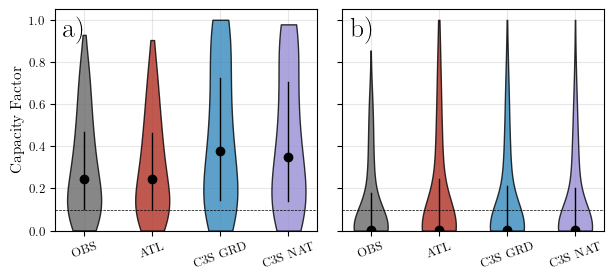

In [ ]:
cm = 1 / 2.54
fig, ax = plt.subplots(1, 2,
                       figsize=(16*cm, 8*cm),
                       sharey=True)

for i in range(2):
    ax[i].set_xticks(range(1, len(label_name) + 1))
    ax[i].set_xticklabels([], rotation = 20)
    ax[i].set_ylim(0, 1.05)
    ax[i].grid(True, alpha = 0.3, zorder = 0)

# Violin plots
violins_onw = ax[0].violinplot(cf_wind,
                               showmeans = False,
                               showmedians = False,
                               showextrema = False,
                               bw_method = 0.5)

violins_spv = ax[1].violinplot(cf_solar,
                               showmeans = False,
                               showmedians = False,
                               showextrema = False,
                               bw_method = 0.5)

# Plot Median and InterQuartile Range
for i in range(len(label_name)):
    ax[0].plot([i+1, i+1],
               [onw_stats[0, i], onw_stats[2, i]],
               color = 'black',
               lw = 1,
               zorder = 3)
    ax[0].scatter(i+1,
                  onw_stats[1, i],
                  color = 'black',
                  zorder = 3) 

    ax[1].plot([i+1, i+1], 
               [spv_stats[0, i], spv_stats[2, i]], 
               color = 'black',
               lw = 1,
               zorder = 3)
    ax[1].scatter(i+1,
                  spv_stats[1, i],
                  color = 'black',
                  zorder = 3)

# Horizontal Line
ax[0].axhline(0.1,
              color = 'k',
              linestyle = '--',
              lw = 0.5,
              zorder = 4)
ax[1].axhline(0.1,
              color = 'k',
              linestyle = '--',
              lw = 0.5,
              zorder = 4)

# Colors
for i, (ele_onw, ele_spv) in enumerate(zip(violins_onw['bodies'], violins_spv['bodies'])):
    ele_onw.set_facecolor(color_models[i % len(color_models)])
    ele_onw.set_edgecolor('black')
    ele_onw.set_alpha(0.8)
    ele_onw.set_zorder(2)
    ele_spv.set_facecolor(color_models[i % len(color_models)])
    ele_spv.set_edgecolor('black')
    ele_spv.set_alpha(0.8)
    ele_spv.set_zorder(2)

# Labels
ax[0].text(0.03, 0.97,
           'a)',
           fontsize = 20,
           ha = 'left', va = 'top',
           transform = ax[0].transAxes)
ax[1].text(0.03, 0.97,
           'b)',
           fontsize = 20,
           ha = 'left', va = 'top',
           transform = ax[1].transAxes)

ax[0].set_ylabel("Capacity Factor")
ax[0].set_xticklabels(label_name)
ax[1].set_xticklabels(label_name)

fig.tight_layout()
fig.subplots_adjust(top = 0.88)
fig.savefig('2_verification_violin.pdf', bbox_inches = 'tight')